### Import all necessary libraries for analysis

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

### Reading the data into pandas dataframe

In [2]:
mental_health = pd.read_csv('survey.csv')
mental_health.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


### Checking the Uniques value in the Gender column

In [3]:
mental_health["Gender"].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

### Cleaning up the Gender column
Evidently, we can see that there are many different values in the Gender column. Most of the issues are caused by typos and some of it is due to gender identification.
The next step will be cleaning up the gender column by stripping all leading or trailing spaces and **CAPITALIZE** the values for initial classification.

In [4]:
mental_health["Gender"] = (mental_health["Gender"]
						   .str.capitalize()
						   .str.strip())
mental_health["Gender"].sort_values().value_counts()

Gender
Male                                              824
Female                                            185
M                                                 150
F                                                  53
Make                                                4
Woman                                               4
Cis male                                            3
Female (trans)                                      2
Man                                                 2
Enby                                                1
Cis-female/femme                                    1
Cis man                                             1
Cis female                                          1
All                                                 1
Androgyne                                           1
Agender                                             1
A little about you                                  1
Genderqueer                                         1
Fluid                

After cleaning up the values inside the gender column, the next step is to clean up the different gender identification. For the next step, we are classifying it to Male, Female ad Third Gender, associating it to the response collected.

In [5]:
sorted_gender = (mental_health["Gender"]
		.str.replace(r"^(?!.*trans|fluid)F.*", "Female", regex=True)  # F but not if contains 'trans' or 'fluid'
    	.str.replace(r"^(?!.*trans|fluid)M.*", "Male", regex=True)    # same idea for Male 
		.str.replace("Woman", "Female", regex = False)				  # Replace "Woman" with "Female"
		.str.replace("Cis(-| )fem.*", "Female", regex=True)			  # Replace "Cis Female" with Female
		.str.replace("Cis ma.*", "Male", regex=True)			 	  # Replace "Cis Male" with Male
		)
sorted_gender = sorted_gender.where(
    sorted_gender.isin(["Male", "Female"]),
    "Third gender"
)
sorted_gender.sort_values().value_counts()

Gender
Male            992
Female          248
Third gender     19
Name: count, dtype: int64

Reassigning it to the Gender column in the dataframe

In [6]:
mental_health["Gender"] = sorted_gender
mental_health

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,Male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,Male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,Female,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


### Cleaning up age column
In this data analysis, we will be removing age that is larger than 100 and below 18 years old. It is done so by assuming people older than 100 years old do not work anymore and it is inappropriate for people under 18 years old to work.

In [7]:
mental_health = mental_health[(mental_health["Age"] >= 18) & (mental_health["Age"] <= 100)]

### Plotting Charts for employees experiencing work interference with mental health condition
Pie chart is selected to visualize the breakdown percentage for each reported work interference

([<matplotlib.patches.Wedge at 0x2050aa66720>,
 [Text(1.0973204553273035, 0.07673212052510867, 'Sometimes'),
  Text(-0.5720178209807422, -0.9395720368766005, 'Never'),
  Text(-1.0793807920638412, 0.21198373929062356, 'Rarely'),
  Text(-0.45130357392093273, 1.0031575569999927, 'Often')],
 [Text(0.598538430178529, 0.041853883922786536, '47.8%'),
  Text(-0.31200972053495024, -0.5124938382963274, '21.9%'),
  Text(-0.5887531593075497, 0.11562749415852193, '16.9%'),
  Text(-0.24616558577505418, 0.5471768492727231, '13.5%')])

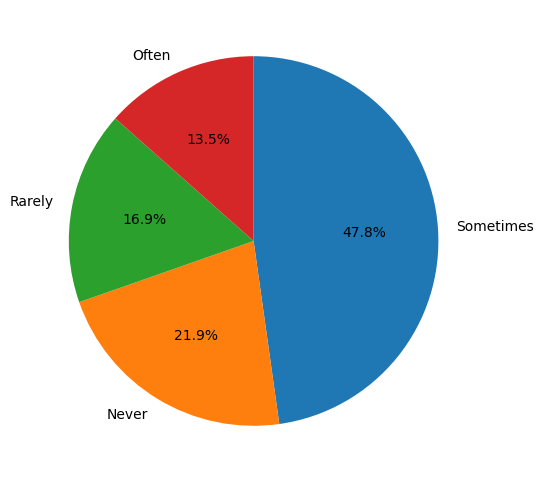

In [8]:
works_in_tech = mental_health[mental_health["tech_company"] == "Yes"] # Filter only those working in tech company
work_interference = works_in_tech["work_interfere"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
	work_interference,
	labels=work_interference.index,
	autopct="%1.1f%%",
	startangle=90,
	counterclock=False
)
# mental_health["tech_company"].value_counts()

### Plotting work interference by gender
This is to find out the gender breakdown with employees who experienced wotk interference due to mental health condition.The chart plotted only take into account where employees work in technology industry.

([<matplotlib.patches.Wedge at 0x2050aa64530>,
 [Text(0.6867486301109563, -0.8592882630646861, 'Male'),
  Text(-0.7181040816752096, 0.8332625803919219, 'Female'),
  Text(-0.04074226604829288, 1.0992452263972996, 'Third gender')],
 [Text(0.3745901618787034, -0.46870268894437417, '78.5%'),
  Text(-0.39169313545920514, 0.45450686203195734, '20.3%'),
  Text(-0.022223054208159752, 0.5995883053076179, '1.2%')])

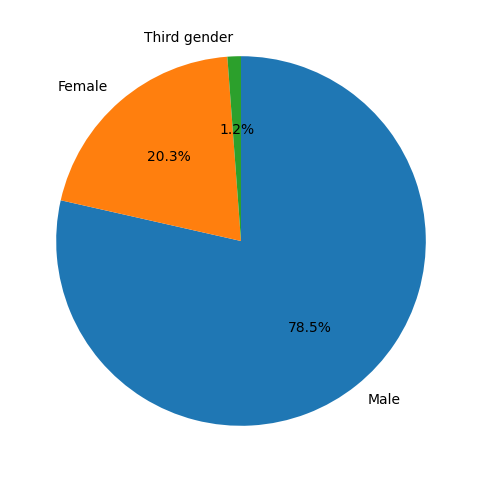

In [9]:
work_interfered = works_in_tech[works_in_tech["work_interfere"] != "Never"] # Filter out those who answered "Never"
plt.figure(figsize=(6,6))
plt.pie(
	work_interfered["Gender"].value_counts(), # Plotting chart base on the gender breakdown
	labels=work_interfered["Gender"].value_counts().index,
	autopct="%1.1f%%",
	startangle=90,
	counterclock=False
)

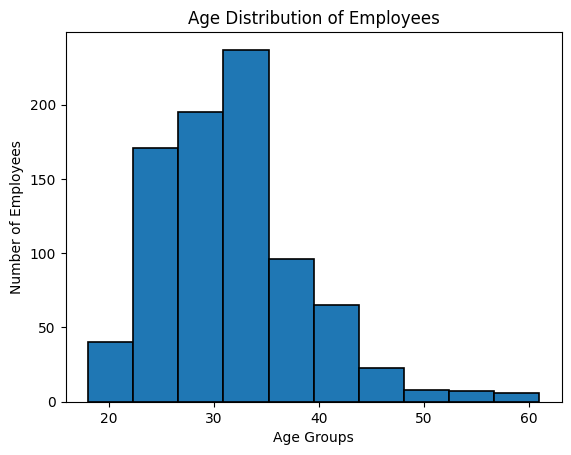

In [10]:
plt.hist(work_interfered["Age"].dropna(), bins=10, edgecolor='black', linewidth=1.2)
plt.xlabel("Age Groups")
plt.ylabel("Number of Employees")
plt.title("Age Distribution of Employees")
plt.show()

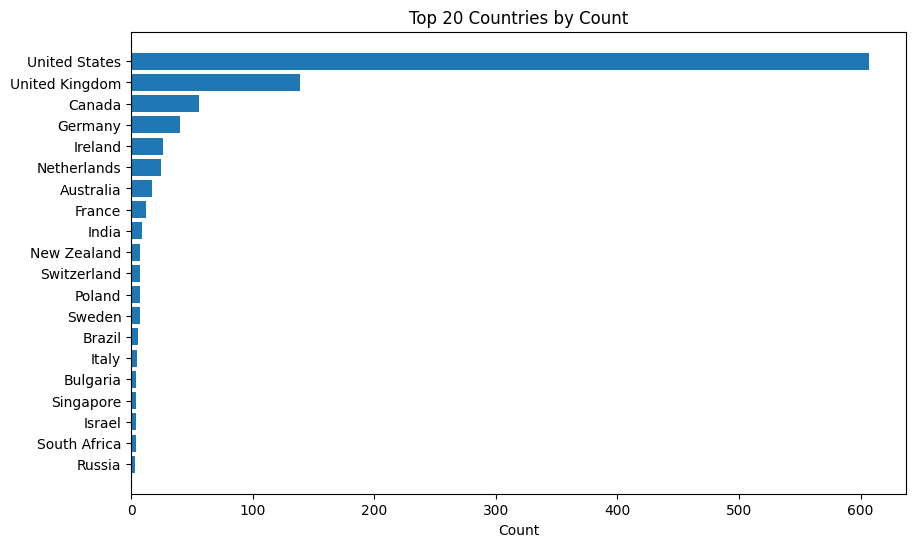

In [11]:
top_countries = works_in_tech["Country"].value_counts().sort_values(ascending=False).head(20)
plt.figure(figsize=(10, 6))
plt.barh(top_countries.index, top_countries.values)
plt.gca().invert_yaxis()  # so largest is at top
plt.xlabel("Count")
plt.title("Top 20 Countries by Count")
plt.show()

Text(0.5, 1.0, 'Employee Mental Health Benefits by Country')

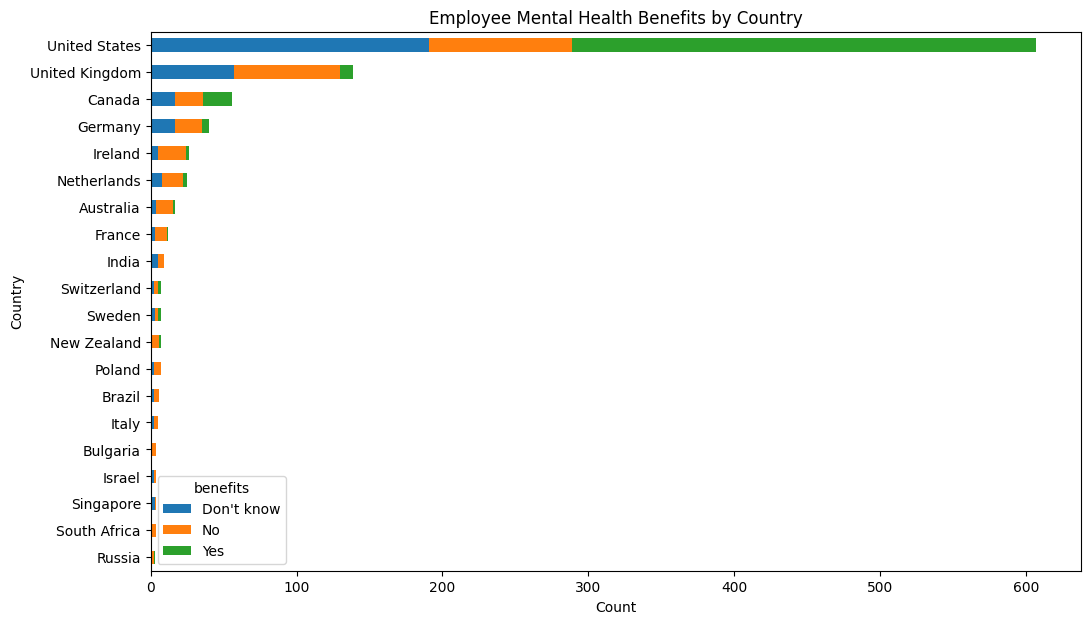

In [12]:
top_countries_list = works_in_tech[works_in_tech["Country"].isin(top_countries.index)]
by_country = top_countries_list.groupby("Country")["benefits"].value_counts().unstack()
by_country.fillna(0, inplace=True)
by_country['sum'] = by_country.sum(axis=1)
by_country = by_country.sort_values('sum', ascending=False).drop(columns='sum')
by_country.plot(kind='barh', stacked=True, figsize=(12, 7))
plt.gca().invert_yaxis()  # so largest is at top
plt.xlabel("Count")
plt.ylabel("Country")
plt.title("Employee Mental Health Benefits by Country")